In [1]:
#import libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

#video link
video_url = 'https://www.youtube.com/watch?v=iPYVYBtUTyE&list=PLUaB-1hjhk8H48Pj32z4GZgGWyylqv85f&index=4'

#read in data
data = '/Users/duk3y2/Library/CloudStorage/OneDrive-Personal/MS_Data_Science/datasets/movies.csv'

df = pd.read_csv(data)






In [2]:
#view the data

df.head()
#df.tail()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
#look for missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    missing = df[col].isna().sum()
    print('{} - {} - {}%'.format(col,missing, pct_missing))
    
    
#impute 

name - 0 - 0.0%
rating - 77 - 0.010041731872717789%
genre - 0 - 0.0%
year - 0 - 0.0%
released - 2 - 0.0002608242044861763%
score - 3 - 0.0003912363067292645%
votes - 3 - 0.0003912363067292645%
director - 0 - 0.0%
writer - 3 - 0.0003912363067292645%
star - 1 - 0.00013041210224308815%
country - 3 - 0.0003912363067292645%
budget - 2171 - 0.2831246739697444%
gross - 189 - 0.02464788732394366%
company - 17 - 0.002217005738132499%
runtime - 4 - 0.0005216484089723526%


In [4]:
#datatypes for our columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

## Removing the country from 'released', and formatting

In [5]:
'''

# Set to store unique countries
unique_countries = set()

# Loop through each entry in the series
for i in df['released']:
    # Find the country within parentheses
    if isinstance(i, str):
        start_index = i.find('(')
        end_index = i.find(')')
        if start_index != -1 and end_index != -1:
            country = i[start_index + 1: end_index]
            # Add the country to the set
            unique_countries.add(country)
            
# Get unique values from the Series
unique_values = df['released'].unique()

#print(unique_countries)

'''



"\n\n# Set to store unique countries\nunique_countries = set()\n\n# Loop through each entry in the series\nfor i in df['released']:\n    # Find the country within parentheses\n    if isinstance(i, str):\n        start_index = i.find('(')\n        end_index = i.find(')')\n        if start_index != -1 and end_index != -1:\n            country = i[start_index + 1: end_index]\n            # Add the country to the set\n            unique_countries.add(country)\n            \n# Get unique values from the Series\nunique_values = df['released'].unique()\n\n#print(unique_countries)\n\n"

In [6]:
'''

# Get the first date in the Series
first_date = df['released'].iloc[0]

# Create a regular expression to match the format of the first date
format_regex = r'^(\w+) (\d{1,2}), (\d{4})(\w+)$'

# Loop through the rest of the Series and check if each date matches the format of the first date
for i in range(1, len(df['released'])):
    date = str(df['released'].iloc[i])
    if not date.str.match(format_regex):
        # If the date does not match the format, change it to match the format of the first date
        df['released'].iloc[i] = first_date.strftime(format_regex)

# Print the Series
print(df['released'])

'''

"\n\n# Get the first date in the Series\nfirst_date = df['released'].iloc[0]\n\n# Create a regular expression to match the format of the first date\nformat_regex = r'^(\\w+) (\\d{1,2}), (\\d{4})(\\w+)$'\n\n# Loop through the rest of the Series and check if each date matches the format of the first date\nfor i in range(1, len(df['released'])):\n    date = str(df['released'].iloc[i])\n    if not date.str.match(format_regex):\n        # If the date does not match the format, change it to match the format of the first date\n        df['released'].iloc[i] = first_date.strftime(format_regex)\n\n# Print the Series\nprint(df['released'])\n\n"

In [7]:
'''

pd.to_datetime(df['released'], format='%B %d, %Y')
#df['released'].head()
#print(df['released'][2])
type(df['released'][2])

'''

#Some of the dates are just month year, and not all in the month dd, yyyy format



"\n\npd.to_datetime(df['released'], format='%B %d, %Y')\n#df['released'].head()\n#print(df['released'][2])\ntype(df['released'][2])\n\n"

In [8]:
#correct year column

'''
The released column is different than the video, it had yyyy-mm-dd format. 
Ours has month-dd-yyyy(country) format

'''
#df['year_correct'] = df['released'].astype(str).str[8:13]
#df

'\nThe released column is different than the video, it had yyyy-mm-dd format. \nOurs has month-dd-yyyy(country) format\n\n'

## End 'released' formatting

In [9]:
#fill nans with 0 & change budget dtype

df['budget'] = df['budget'].fillna(0,axis=0)
df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].fillna(0,axis=0)
df['gross'] = df['gross'].astype('int64')

#format 'released', fill NaNs, remove countries and convert to datetime object
df['released'] = df['released'].fillna('january 01,2023(United States)',axis=0)

'''
# Remove country names from each entry
for country in unique_countries:
    df['released'] = df['released'].str.replace('\s*\({}\)'.format(country), '', regex=True)

#df['released'] = df['released'].str.replace('\s*\(United States\)','',regex=True)
'''


"\n# Remove country names from each entry\nfor country in unique_countries:\n    df['released'] = df['released'].str.replace('\\s*\\({}\\)'.format(country), '', regex=True)\n\n#df['released'] = df['released'].str.replace('\\s*\\(United States\\)','',regex=True)\n"

## fix below cell date formatting

## Write a function to impute all columns

In [10]:
## Write a function to impute columns with mean or mode imputation depending on continuous/categorical


def impute_missing_values(df):
  '''Imputes missing values in a Pandas DataFrame.

  Args:
    df: The Pandas DataFrame to impute missing values in.

  Returns:
    The imputed Pandas DataFrame.
  '''

  # Check for missing values
  for column in df.columns:
    if df[column].isna().any():
      # Impute missing values with mean for continuous values
      if df[column].dtype == "float64":
        df[column].fillna(df[column].mean(), inplace=True)
      # Impute missing values with mode for categorical values
      elif df[column].dtype == "object":
        df[column].fillna(df[column].mode()[0], inplace=True)

  return df  

df = impute_missing_values(df)

In [11]:
df.isna().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [12]:
pd.set_option('display.max_rows',None)#view option to see entire dataset vs head/tail
df = df.sort_values(by=['gross'],inplace=False,ascending=False)#sort df by gross revenue

In [13]:
#drop dupes

df['company'].drop_duplicates().sort_values(ascending=False)

7129                                              thefyzz
5664                                          micro_scope
6412                             iDeal Partners Film Fund
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
524                             Zupnik-Curtis Enterprises
3330                          Zucker Brothers Productions
520                                      Zoetrope Studios
2213                                   Zeta Entertainment
6222                        Zentropa International Norway
3698                              Zentropa Entertainments
1175                                 Zenith Entertainment
5180                                      Zazen Produções
3193                                          ZapPictures
1321                             Zanuck/Brown Productions
1329          

In [14]:
df['gross'][5445]

2847246203

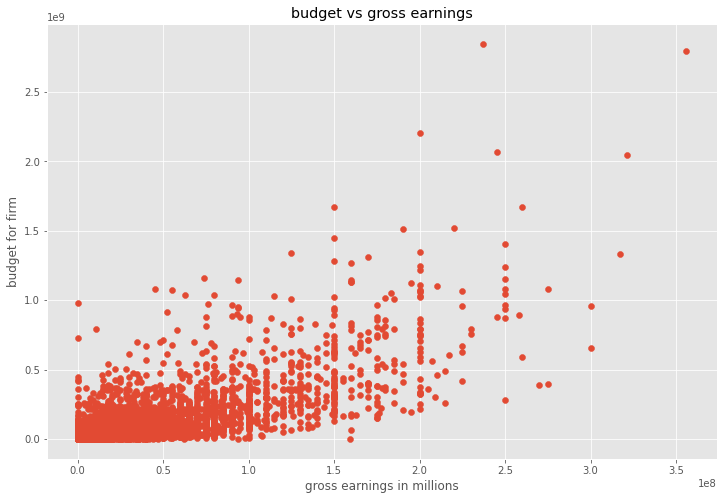

In [15]:
#scatter plot for correlations

plt.scatter(x=df['budget'],y=df['gross'])
plt.title('budget vs gross earnings')
plt.xlabel('gross earnings in millions')
plt.ylabel('budget for firm')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

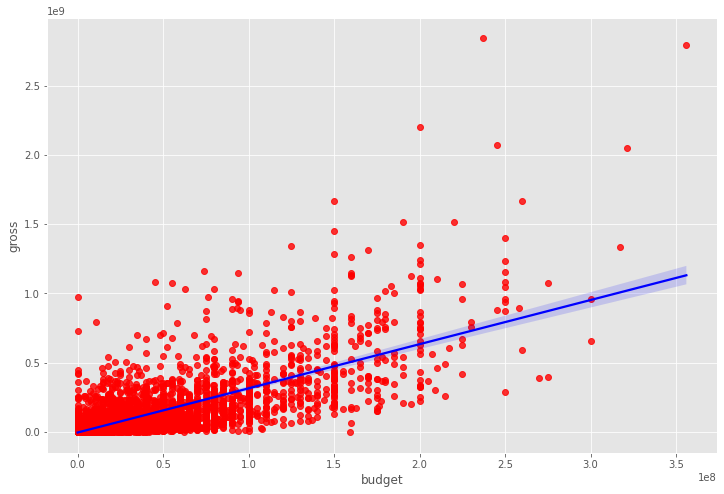

In [16]:
#plot the budget vs gross

sns.regplot(x='budget', y='gross',data=df,scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [17]:
#correlation, pearson,kendall, spearman

corr_matrix = df.corr(method='pearson')
corr_matrix

,year,score,votes,budget,gross,runtime
year,1.000000,0.097936,0.222810,0.309212,0.261900,0.120766
score,0.097936,1.000000,0.409182,0.055661,0.186384,0.399329
votes,0.222810,0.409182,1.000000,0.486821,0.632807,0.309166
budget,0.309212,0.055661,0.486821,1.000000,0.750157,0.269485
gross,0.261900,0.186384,0.632807,0.750157,1.000000,0.245223
runtime,0.120766,0.399329,0.309166,0.269485,0.245223,1.000000


Text(87.0, 0.5, 'Movie Features')

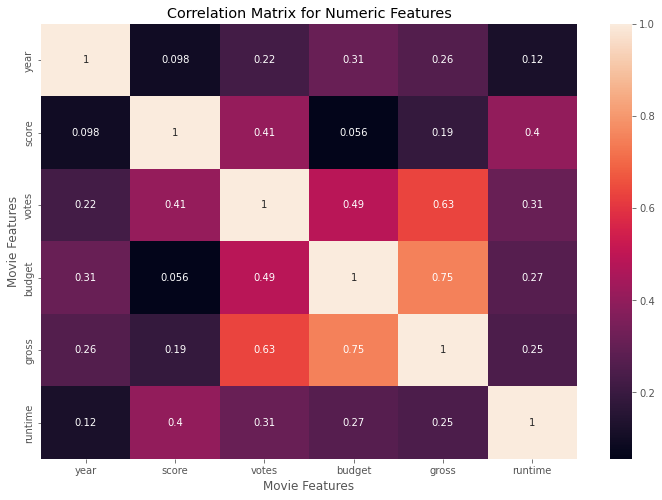

In [18]:
#Correlation heatmap
sns.heatmap(corr_matrix,annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

In [19]:
#look at company, drop released

df_num = df

for col_name in df_num.columns:
    if (df_num[col_name].dtype=='object'):
        df_num[col_name] = df_num[col_name].astype('category')
        df_num[col_name] = df_num[col_name].cat.codes
        
df_num = df_num.drop(['released'],axis=1)

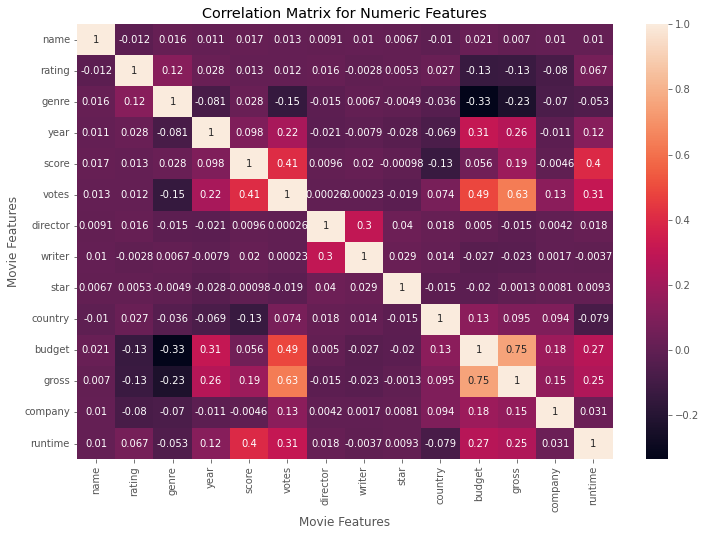

In [20]:
#Correlation heatmap

corr_matrix = df_num.corr(method='pearson')
sns.heatmap(corr_matrix,annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [21]:
correlation_mat = df_num.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name      name        1.000000
          rating     -0.012441
          genre       0.016355
          year        0.011453
          score       0.017095
          votes       0.013086
          director    0.009079
          writer      0.010018
          star        0.006749
          country    -0.010425
          budget      0.020548
          gross       0.006989
          company     0.010369
          runtime     0.010390
rating    name       -0.012441
          rating      1.000000
          genre       0.123465
          year        0.027931
          score       0.013246
          votes       0.012378
          director    0.016255
          writer     -0.002795
          star        0.005314
          country     0.026930
          budget     -0.131148
          gross      -0.130522
          company    -0.079626
          runtime     0.066641
genre     name        0.016355
          rating      0.123465
          genre       1.000000
          year       -0.081261
        

In [22]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget    genre      -0.334021
genre     budget     -0.334021
          gross      -0.234297
gross     genre      -0.234297
genre     votes      -0.145276
votes     genre      -0.145276
score     country    -0.134577
country   score      -0.134577
budget    rating     -0.131148
rating    budget     -0.131148
gross     rating     -0.130522
rating    gross      -0.130522
year      genre      -0.081261
genre     year       -0.081261
company   rating     -0.079626
rating    company    -0.079626
country   runtime    -0.079265
runtime   country    -0.079265
company   genre      -0.070013
genre     company    -0.070013
year      country    -0.069423
country   year       -0.069423
genre     runtime    -0.052699
runtime   genre      -0.052699
genre     country    -0.035896
country   genre      -0.035896
star      year       -0.027745
year      star       -0.027745
budget    writer     -0.026802
writer    budget     -0.026802
          gross      -0.022957
gross     writer     -0.022957
year    

In [23]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

gross     votes       0.632807
votes     gross       0.632807
gross     budget      0.750157
budget    gross       0.750157
name      name        1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
director  director    1.000000
votes     votes       1.000000
score     score       1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [24]:
# Votes and budget have the highest correlation to gross earnings